In [30]:
print('Im working')

Im working


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
# Imports for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn import preprocessing
from scipy.spatial import distance
from tqdm import tqdm
# import plotly.tools as tls


In [32]:
# Read the dataset
df = pd.read_csv("data/data6.csv")

In [33]:
# method to sample a dataset (hardcoded seed for randomized selection, see alternatives in comment)
def get_sample_from_dataset(prop, dataset):
    # randomly define sample from dataset
    # good seeds to try: 13, 42, 1123, 5813, 213455
    np.random.seed(seed=42)
    # We are going to use bootstrapping
    sample_proportion =  prop
    dataset_size = len(dataset)
    sample_size = sample_proportion * dataset_size
    # perform scaling on the dataset
    dataset = preprocessing.scale(df)
    # Turn into a pandas array again
    dataset = pd.DataFrame({'Column1':dataset[:,0],'Column2':dataset[:,1],'Column3':dataset[:,2],'Column4':dataset[:,3],'Column5':dataset[:,4],'Column6':dataset[:,5]})
    
    print("The sample size we are going to use will be: "+ str(sample_size))
    # Run the sampling
    chosen_idx = np.random.choice(dataset_size, replace=False, size=int(sample_size))
    sampled_dataset =  dataset.iloc[chosen_idx]
    print("The new shape of the sampled dataset is: " + str(sampled_dataset.values.shape))
    return sampled_dataset


The sample size we are going to use will be: 3000.0
The new shape of the sampled dataset is: (3000, 6)


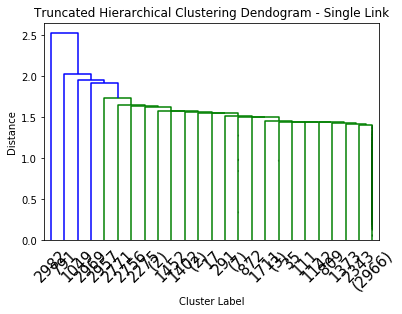

In [34]:
np.random.seed(seed=42)

# Get a sample from the data-set to run hierarchical clustering
sampled_dataset = get_sample_from_dataset(0.01, df)

# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'single')

dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendogram - Single Link')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')

plt.show()  

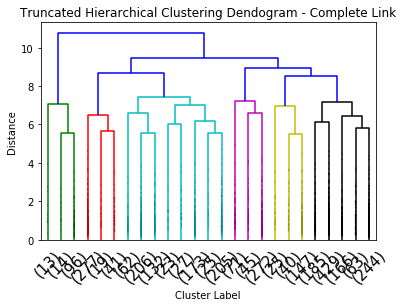

In [35]:
# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'complete')

dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendogram - Complete Link')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')

plt.show()  

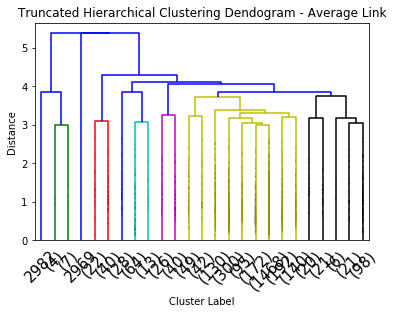

In [36]:
# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'average')

dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendogram - Average Link')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')

plt.show()  

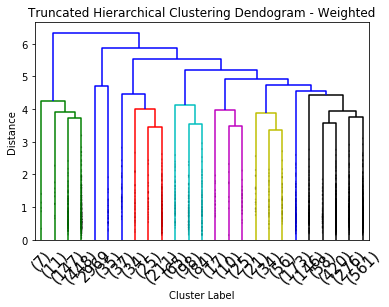

In [37]:
# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'weighted')

dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendogram - Weighted')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')

plt.show() 

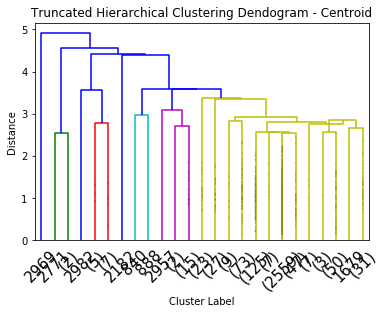

In [38]:
# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'centroid')

dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendogram - Centroid')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')

plt.show() 

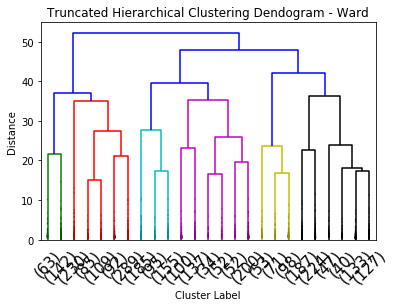

In [39]:
# Perform Linkage on the sampled dataset
arrayFormDf = sampled_dataset.values
 
linked = linkage(arrayFormDf, 'ward')

dendrogram(linked,  
            truncate_mode='lastp',
            p=25,
            leaf_rotation=45.,
            leaf_font_size=15.,
            show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendogram - Ward')
plt.xlabel('Cluster Label')
plt.ylabel('Distance')

plt.show() 

In [42]:
np.random.seed(seed=42)

# Helper function we are going to use to generate the Hopkins Stat"
def generateRandom(min, max, n):
    # Call NP function for unif random values
    randomArray = np.random.uniform(min,max,n)
    return randomArray
    
# Function to determine the eucliean N-distance between 2 points"
def getDistance(i,j):
    dst = distance.euclidean(i, j)
    return dst
    
# Function to generate a random Vector for the hopkins stat"
def generateRandomVector(dimensions, arrayFormData):
    # Calculate size of the data
    size = len(arrayFormData)
    minValues = []
    maxValues = []
    randomVector = np.zeros(shape=(size,dimensions))
    for i in range(dimensions):
        #Calculate the min and max values
        currentMinValue = min(arrayFormData[:,i])
        currentMaxValue = max(arrayFormData[:,i])
    
        # Generate random numbers between min-max"
        currentComponent = generateRandom(currentMinValue, currentMaxValue, size)
        #Apend to result
        randomVector[:,i] = currentComponent
    
    return randomVector

# Hopkins Stat
def hopkinsStat(uniformVector, arrayFormDf):
    # Hopkins Stat code
    # Initialize denom at 0 
    numerator = 0

    for j in range(len(arrayFormDf)):
        # Set current Min to something huge
        currentMin = 10000

        for i in range(len(arrayFormDf)):    
            # Calculate distance out of a point
            dst = getDistance(uniformVector[j], arrayFormDf[i])
            if dst < currentMin:
                currentMin = dst

        numerator = numerator + currentMin

    # Initialize the num at 0
    denominator = 0


    for j in range(len(arrayFormDf)):
        # Set the current Min to something huge
        currentMin = 1000
        for i in range(len(arrayFormDf)):
            # If i equial j skip
            if i == j:
                continue

            # Calculate distance out of a point
            dst = getDistance(arrayFormDf[j], arrayFormDf[i])
            if dst < currentMin:
                currentMin = dst

        denominator = denominator + currentMin
    
    # Calculate it!
    hopkinsStat = numerator / (numerator + denominator)
    return hopkinsStat

In [43]:
# Calculate the hopkins stat
# Generate a random vector
# Set seed
np.random.seed(seed=42)
sampled_dataset = get_sample_from_dataset(0.0005, df)

# Calculation of the random vector
hopkinsVector = generateRandomVector(6, sampled_dataset.values)

results = []
for i in range(250):
    np.random.seed(seed=(42 + i))

    # Get a sample from the data-set to run the hopkins stat
    sampled_dataset = get_sample_from_dataset(0.0005, df)
    arrayFormSample = sampled_dataset.values
    
    # Print to see progress
    print("Iteration: " + str(i+1))

    ## CALCULATION OF THE HOPKINS STAT ##
    result = hopkinsStat(hopkinsVector, arrayFormSample)
    
    # Apend to the results array
    results.append(result)

print(results)

# Call Hopkins Function
#result = hopkinsStat(hopkinsVector, arrayFormSample)
#print(result)

The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 1
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 2
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 3
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 4
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 5
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 6
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 7
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)


The new shape of the sampled dataset is: (150, 6)
Iteration: 71
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 72
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 73
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 74
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 75
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 76
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 77
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 78
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 79
The sample size 

The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 142
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 143
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 144
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 145
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 146
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 147
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 148
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 149
The sample size we are going to use will be: 150.0
The new shape of the 

The new shape of the sampled dataset is: (150, 6)
Iteration: 212
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 213
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 214
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 215
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 216
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 217
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 218
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 219
The sample size we are going to use will be: 150.0
The new shape of the sampled dataset is: (150, 6)
Iteration: 220
The sam

[0.6936717990165111, 0.7011460356792901, 0.6739434594377336, 0.7032591014173492, 0.6935623534482999, 0.6839427056923255, 0.7043773271085427, 0.6973152141030391, 0.6816242168175052, 0.7022285925726632, 0.7104443864219051, 0.6870773975507415, 0.6857601456852126, 0.6949267314239084, 0.6920245740551605, 0.6775096868275523, 0.7079837490943242, 0.6928549219312782, 0.6962243685255877, 0.7078734620912228, 0.6963970922343541, 0.6995241922861728, 0.7007459737180228, 0.6805890574842167, 0.6932475246799046, 0.684247107613178, 0.7085921175099422, 0.694732648097146, 0.693253276842087, 0.6995109030652235, 0.6897603463785416, 0.6911948180759468, 0.6904968424972341, 0.7045255395856694, 0.7055068705507704, 0.6987864424628101, 0.6912820004073658, 0.6960975838414629, 0.7009399300312323, 0.6671676642302844, 0.7084894022528728, 0.6871213878150783, 0.6799894856071624, 0.6822160608233998, 0.6915224374075923, 0.6650167485875207, 0.6962938107530355, 0.6949386505960676, 0.6845292853623985, 0.7144351675521796, 0.

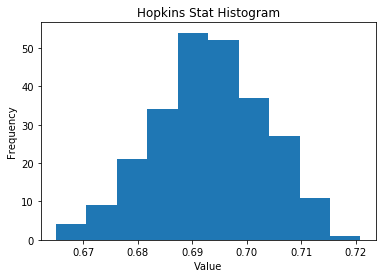

In [44]:
# Plot a histogram with the results of the hopkins stat vector
plt.hist(results)
plt.title("Hopkins Stat Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()